<a href="https://colab.research.google.com/github/EvaLiho/WoTech/blob/main/17_08_24_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding the data

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# TV - advertising budget spent on TV marketing
# Sales - how much we have sold (revenue, income)

In [3]:
advertising.head() #first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### Regression plot

In [5]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

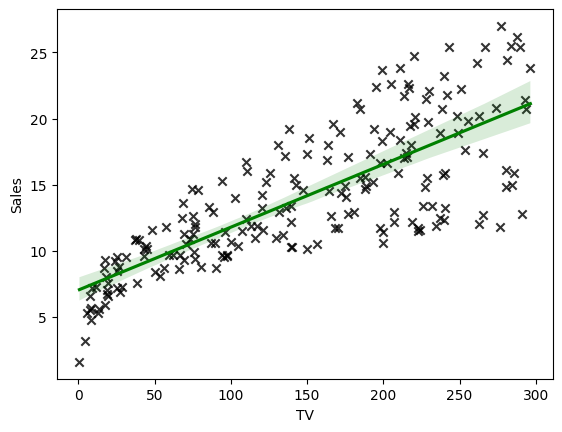

In [7]:
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

###Pearson correlation

In [9]:
# Pearson correlation coefficient (#positive, strong)
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [10]:
advertising['TV'].corr(advertising['Sales']) #same but with only one value

0.7822244248616061

### Supervised VS Unsupervised Learning

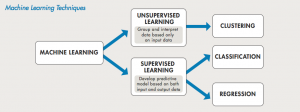
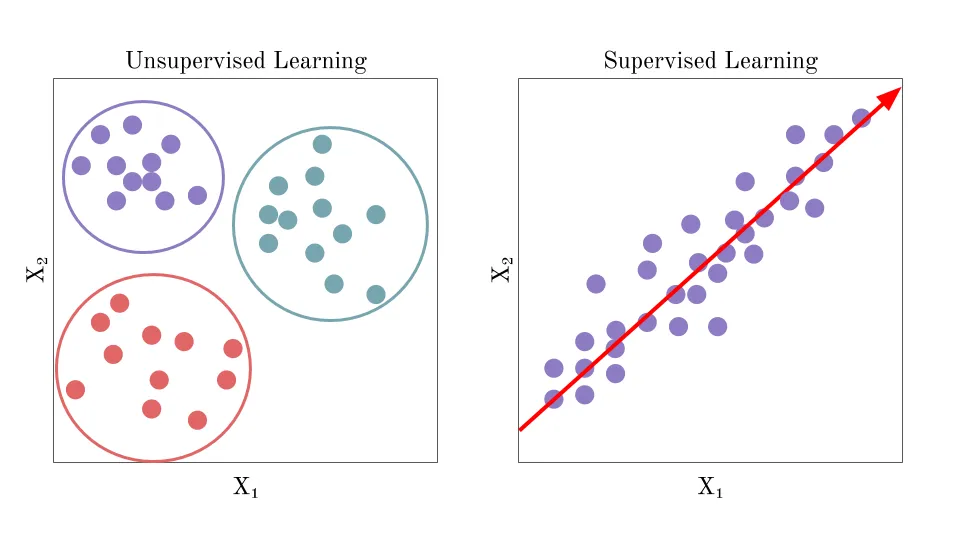

# Training linear regression model

scikit-learn library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Data Preparation

In [13]:
# Preparing X
X = advertising.drop('Sales', axis=1) #independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
# Preparing Y
Y = advertising.drop('TV', axis=1) #the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Train/Test sets

In [20]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [26]:
X_train

,TV
135,48.3
178,276.7
162,188.4
120,141.3
93,250.9
...,...
122,224.0
111,241.7
143,104.6
40,202.5


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

train_size = 0.7 - 70% of the data goes into testing, 30% will be used for testing the data

random_state=42 - to get the same values every time (not needed)

In [22]:
X_train

,TV
163,163.5
154,187.8
32,97.2
62,239.3
131,265.2
...,...
186,139.5
193,166.8
132,8.4
96,197.6


COLUMN in a dataframe is called a FEATURE

ROW is called an OBSERVATION

### Train the Model

In [27]:
from sklearn.linear_model import LinearRegression #Import the model

In [28]:
model = LinearRegression() #Initialize the model

In [31]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [32]:
# Y = mX + b - linear regression function
# slaes (Y), slope (m), intercept(b) (where linear line intercepts X line, X=0)

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [13.48351597]
Model coefficient is: [[0.00687404]]


### A Prediction

In [38]:
my_new_budget = [[50]] # same format as the model, [[]] - 2D array dataset

my_predicted_sales = model.predict(my_new_budget)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 50, then predicted sales are 14.


In [39]:
X_test.head()

,TV
127,80.2
78,5.4
137,273.7
133,219.8
155,4.1


In [43]:
y_pred = model.predict(X_test)

In [54]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred

In [55]:
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.034814
15,195.4,22.4,13.520636
30,292.9,21.4,15.364942
158,11.7,7.3,14.994431
128,220.3,24.7,13.511700


In [56]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [57]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.034814,2.865186
15,195.4,22.4,13.520636,8.879364
30,292.9,21.4,15.364942,6.035058
158,11.7,7.3,14.994431,7.694431
128,220.3,24.7,13.511700,11.188300
